<a href="https://colab.research.google.com/github/ucl-casa-ce/casa0018/blob/main/Week3/CASA0018_3_2_MNISTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST CNN
In this example we are still using the same MNIST dataset but this time we will be using Convolutions to try and improve the accuracy of our model.

Information on the NMIST character dataset can be found [here](http://yann.lecun.com/exdb/mnist/).

# Importing dependencies
Let's start by importing TensorFlow, printing out the version number and create an object that points to the MNIST data via the tf.keras datasets API. How did we know where the dataset was? TensorFlow Datasets provide a list of resources that are easily accessible in the Colabs - a catalogue of what is availabe is at: https://www.tensorflow.org/datasets/catalog/overview)


In [1]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist

2.3.0



# Loading the image data
Calling **load_data** on the **mnist** object will give you two sets of lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [2]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Exploring the data and preparing it for use
What does these values look like? We are going to import a library that helps us display an image and point it to a training image, and a training label to see. Experiment with different indices in the array.


shape: (28, 28)
Label: 0


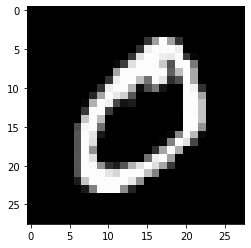

In [3]:
sample = 1;
print("shape:", training_images[sample].shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[sample], cmap='gray')
print("Label:", training_labels[sample])


Each of the 'pixel' values above are between 0 (black) and 255 (white). 

The first change needed from the previous example is the **input shape**. Previously each image was being passed into the input layer - ie a 28x28 pixel image with 1 colour depth. But now we need to pass in all the data as a single list - ie 60000 images - which means our input tensor is 60000x28x28x1 items in a list. This is also the same for the test data.

We still '**normalize**' the data between 0 and 1 in the same way, ie in Python we just need to divide all values by 255.0:

In [4]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

# Building the model
To create the sequence of layers in a model we use  '**Sequential**'. The model has 7 layers with the first 4 being a mix of convlution and pooling. 

We use **Conv2d** to specify a convolution layer and assign **64 convolutions** of size **3x3**, we use a
'**relu**' (Rectified Linear Unit - ReLU) activation function which converts any negative value to zero (to keep us between 0 and 1) and define the input shape to be 28x28 pixels with 1 colour depth).

In the second layer we use **MaxPooling** to define a pooling layer which compresses the image while maintaining features. By specifying a size **2x2** we are effectively quartering the size of the image. 

We then repeat the same pattern again for layers 3 and 4.

The remaining layers are the same as the previous model architecture. Layer 5 is called '**Flatten**' which takes the previous layer and turns it into a 1 dimensional set. The 6th layer '**Dense**' has 128 neurons and also uses '**relu**' and the 7th layer '**Dense**' has 10 neurons which relate to the 10 MNIST categories. It implements a '**softmax**' activition function which looks at all the probabilities in that layer of neurons and sets the highest value to 1 and all the others to 0 - this makes it programatically easier to find the most likely solution.  

Finally we output a model summary - note how many parameters this model creates compared to ones built so far.

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

After defining the model we build it by compiling with an optimizer and loss function and then train it by calling **model.fit** to fit your training data to your training labels. 

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1252 - accuracy: 0.9614
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9871
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9950


The accuracy value at the end of the final epoch is about 0.99 or about 99% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 99% of the time. Whilst each epoch takes longer to run, this model is more accurate than the previous without the convolutions.

Next we can call '**model.evaluate**', and pass in the test data, and it will report back the loss for each. Let's give it a try:

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0284 - accuracy: 0.9924


[0.02836291864514351, 0.9923999905586243]

For me, that returned a accuracy of about .9895, which means it was about 98.95% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  

# Extras

If you want to dig deeper into finding out were errors or misclassifications are coming from take a look at **TensorBoard**. It provides a useful tool to check your model results and it makes really useful visualisations for sharing your results. 

The example below shows a quick way of "seeing" a confusion matrix of the results. 


In [14]:
import numpy as np 
test_predictions = np.argmax(model.predict(test_images),axis=-1)
#test_predictions = model.predict_classes(test_images) - deprecated in TF 2.6
result = tf.math.confusion_matrix(test_labels, test_predictions)
print(result)

tf.Tensor(
[[ 978    1    0    0    0    0    0    1    0    0]
 [   0 1128    1    4    0    0    0    1    0    1]
 [   0    0 1030    0    0    0    0    2    0    0]
 [   0    0    1 1008    0    0    0    0    1    0]
 [   1    0    0    0  975    0    2    1    1    2]
 [   1    0    0   12    0  878    1    0    0    0]
 [   5    2    0    0    2    1  947    0    1    0]
 [   0    2    4    0    1    0    0 1018    1    2]
 [   0    0    1    1    0    1    0    0  970    1]
 [   0    1    0    5    4    4    0    2    1  992]], shape=(10, 10), dtype=int32)


To see how you can visualise this in TensorBoard take a look at these two links:


1.   [Intro to TensorBoard](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/get_started.ipynb#scrollTo=-Iue509kgOyE)
2.   [Displaying image data in TensorBoard](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/image_summaries.ipynb)
